In [1]:
# Paul-Jason Mello
# Feb 20, 2022
# CMPE 257 HW2

# Linear Regression

## 1 Explain how a linear regression algorithm trains in your own words

In [2]:
# Linear Regression is in essence using an algorithm to predict relationships between variables.
# It is essentially using the data points created to plot a best fit line for continuous variable prediction.
# Since it is linear we must assume that the predicting variable is linear in relation to the regressors.

## 2 Load the sklearn boston dataset

In [3]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

In [4]:
boston = datasets.load_boston()

C:\Users\GIGA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [5]:
BostonData = pd.DataFrame(boston.data, columns = boston.feature_names)
medV = pd.DataFrame(boston.target, columns = ["MEDV"])
data = pd.concat([BostonData, medV], axis = 1) 
BostonData = pd.DataFrame(data)

BostonData.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## 3 Visualize the dataset using graphs

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

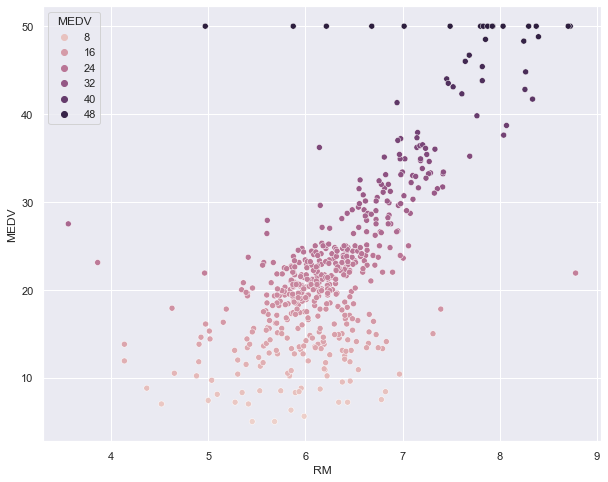

In [6]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.scatterplot(data = BostonData, x = "RM", y = "MEDV", hue = "MEDV")
# Data seems to have a cieling for MEDV values.

C:\Users\GIGA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\GIGA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

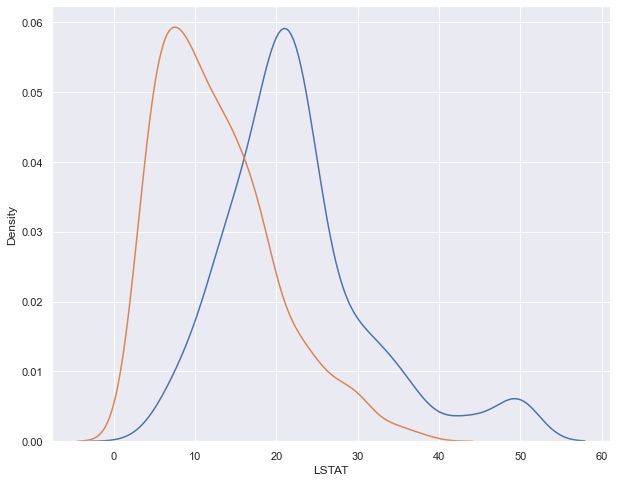

In [7]:
sns.distplot(BostonData.MEDV, hist=False)
sns.distplot(BostonData.LSTAT, hist=False)

## 4 Calculate the pearson correlation matrix of the data

[Text(0.5, 1.0, 'Correlation Matrix\n')]

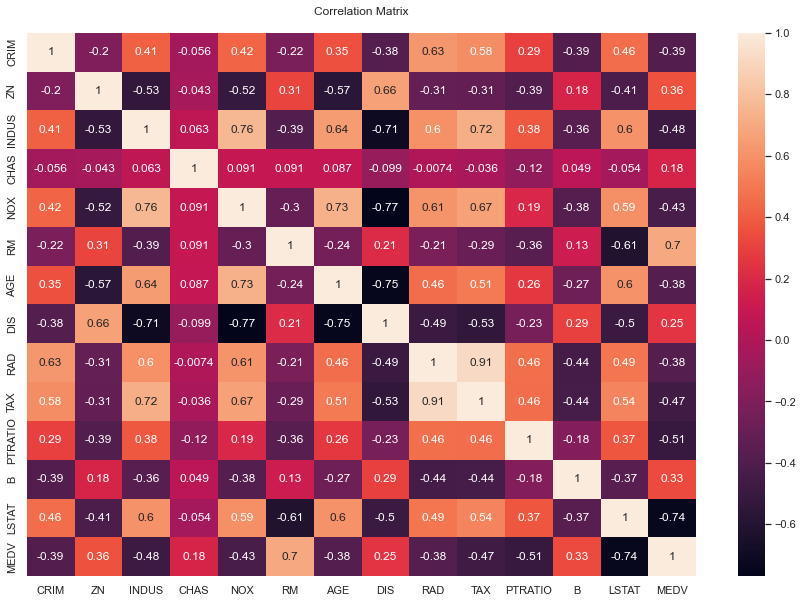

In [8]:
sns.set(rc = {'figure.figsize':(15,10)})
bostData = sns.heatmap(BostonData.corr(), annot = True)
bostData.set(title = "Correlation Matrix\n")

## 5 Select features which are more related to the target variable using graphs and the correlation matrix, are the both indicating the same features? (MEDV is the target variable)

In [9]:
# Correlated Features: RM, LSTAT, PTRATIO 
# chosen with (1 > x > .50) and (-1 < x < .50) using the correlation matrix above 
# Can not re-run this code, else it will remove additional unintended columns. Run once ONLY

BData = BostonData.drop(BostonData.columns[[0, 1, 2, 3, 4, 6, 7, 8, 9, 11]], axis=1)

In [10]:
BData.head(10)

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
5,6.430,18.7,5.21,28.7
6,6.012,15.2,12.43,22.9
7,6.172,15.2,19.15,27.1
8,5.631,15.2,29.93,16.5
9,6.004,15.2,17.10,18.9


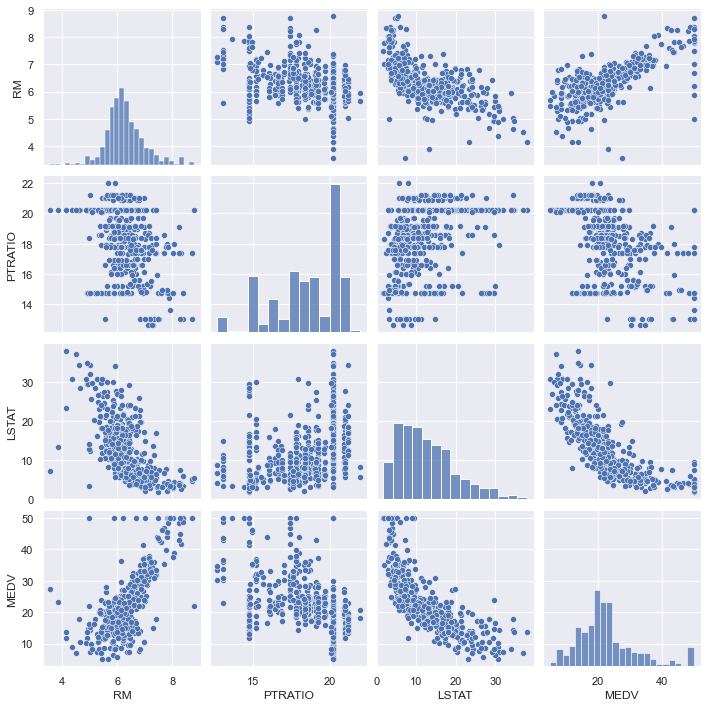

In [11]:
# Here we can see a bunch of interesting distributions, some logarithmic, exponential,
# normal, and random at times. Each gives us an idea about how the data relates to one another.
sns.pairplot(BData)

## 6 Compare correlation of feature between themselves and if two features are highly correlated remove one of them (the one with lesser correlation with the target variable) 

[Text(0.5, 1.0, 'Correlation Matrix\n')]

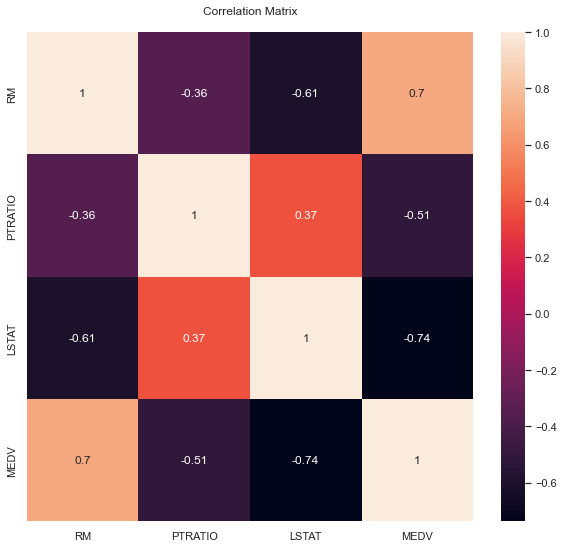

In [12]:
sns.set(rc = {'figure.figsize':(10,9)})
bostData = sns.heatmap(BData.corr(), annot = True)
bostData.set(title = "Correlation Matrix\n")

In [13]:
# As per the instructions I am removing the variable with the least correlation, which is PTRATIO.
# Can not re-run this code, else it will remove additional unintended columns. Run once ONLY
BDataClean = BData.drop(BData.columns[[0]], axis = 1)

In [14]:
BDataClean.head(10)

,PTRATIO,LSTAT,MEDV
0,15.3,4.98,24.0
1,17.8,9.14,21.6
2,17.8,4.03,34.7
3,18.7,2.94,33.4
4,18.7,5.33,36.2
5,18.7,5.21,28.7
6,15.2,12.43,22.9
7,15.2,19.15,27.1
8,15.2,29.93,16.5
9,15.2,17.10,18.9


## 8 Split into train and test

In [15]:
def dataSplit(data):
    X = data.loc[:, data.columns != 'MEDV']
    Y = data.MEDV
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)
    return X_train, X_test, Y_train, Y_test

## 9 Normalize the data

In [16]:
def normData(data):
    data_norm = (data - data.min()) / (data.max() - data.min())
    return data_norm

## 10 Train the model and perform hyper parameter tuning using cross validation

In [17]:
def modelMaker(X_train, Y_train):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model

In [18]:
# K represents the number of folds we choose. This was tweaked through running the program multiple times
# we then found the individual K for each and paramaterized it.
def folding(X_train, Y_train, k):
    kfold = sk.model_selection.KFold(n_splits = k)
    model = LinearRegression()
    accuracies = sk.model_selection.cross_val_score(model, X_train, Y_train, cv = kfold)
    avg = sum(accuracies)/k
    print("Average Accuracy for " + str(k) + " folds: " + str(avg))

## 11 Test the model on test set

In [19]:
def modelTest(model, X_test, Y_test):
    y_predictions = model.predict(X_test)
    score = metrics.r2_score(Y_test, y_predictions)
    return score

## 7 perform the following steps 3 times, 1 with the entire dataset, 1 with the selected features from step 5 and 1 with the selected features from step 6 

## NOTE: FEATURE SELECTION IS USUALLY REQUIRED ONLY WHEN THERE ARE 100s TO 1000s OF FEATURES OR MORE, BUT HERE FOR EDUCATIONAL PURPOSES WE ARE PRACTICING FEATURE SELECTION ON A SMALLER DATASET

In [20]:
# Whole Data

X_train, X_test, Y_train, Y_test = dataSplit(BostonData)
data_norm = normData(BostonData)
model = modelMaker(X_train, Y_train)
print("Model Coefficents: ")
print(list(BostonData.columns.values))
print("\n")
folded = folding(X_train, Y_train, 8) # Eight Splits was the best average accuracy
print("\n")
print("Model Coefficents: " + str(model.coef_))
accuracy = modelTest(model, X_test, Y_test)
print("\nR^2 Accuracy, No KFold: " + str(accuracy))

Model Coefficents: 
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


Average Accuracy for 8 folds: 0.7181884616529068


Model Coefficents: [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]

R^2 Accuracy, No KFold: 0.6733825506400175


In [21]:
# Partial Data

X_train, X_test, Y_train, Y_test = dataSplit(BData)
data_norm = normData(BData)
model = modelMaker(X_train, Y_train)
print("Model Coefficents: ")
print(list(BData.columns.values))
print("\n")
folded = folding(X_train, Y_train, 4) # Four Splits was the best average accuracy
print("\n")
print("Model Coefficents: " + str(model.coef_))
accuracy = modelTest(model, X_test, Y_test)
print("\nR^2 Accuracy, No KFold: " + str(accuracy))

Model Coefficents: 
['RM', 'PTRATIO', 'LSTAT', 'MEDV']


Average Accuracy for 4 folds: 0.6926923482656299


Model Coefficents: [ 4.44512502 -1.11165635 -0.55760828]

R^2 Accuracy, No KFold: 0.5985591440090561


In [22]:
# Concise Data

X_train, X_test, Y_train, Y_test = dataSplit(BDataClean)
data_norm = normData(BDataClean)
model = modelMaker(X_train, Y_train)
print("Model Coefficents: ")
print(list(BDataClean.columns.values))
print("\n")
folded = folding(X_train, Y_train, 8) # Eight Splits was the best average accuracy
print("\n")
print("Model Coefficents: " + str(model.coef_))
accuracy = modelTest(model, X_test, Y_test)
print("\nR^2 Accuracy, No KFold: " + str(accuracy))

Model Coefficents: 
['PTRATIO', 'LSTAT', 'MEDV']


Average Accuracy for 8 folds: 0.6270124083240145


Model Coefficents: [-1.34871093 -0.80376983]

R^2 Accuracy, No KFold: 0.5131527495094277


In [23]:
# Without KFold cross validation it appears that the more variables we give the model the better 
# the outcomes appear to be. However, the average accuracy of some KFolds are significantly better
# than their none-folded counter-parts